In [22]:
%matplotlib inline
from IPython.display import display, Image

# 금융 통계 실습 09 - 회귀분석

### [금융 데이터 분석 입문]

#### 이승준 http://fb.com/plusjune

<img width="400" src="https://goo.gl/oAeO3y" style="float:left"/>

In [23]:
import numpy as np
import pandas as pd
from pandas_datareader import data
import requests
from datetime import datetime
import matplotlib.pyplot as plt

# 보편적 회귀법칙 (law of universal regression)
* 영국 유전학자 프랜시스 골턴 (F. Galton, 1822 ~ 1891), 찰스 다윈의 사촌
* [Family Likeness in Stature] (1886)
* 일반적으로 키가 큰 부모에게서 키 큰 자녀가, 키가 작은 부모에게서 키 작은 자녀가 태어난다.
* 그러나, 키가 크던 작던 자녀들의 평균 키는 전체 평균 키 수준에 접근하는 현상
* 자녀들의 평균 키는 전체 인구의 평균 키로 회귀(regression)하는 경향이 있다.

# 단순회귀분석 (Simple Linear Regression)
* https://en.wikipedia.org/wiki/Simple_linear_regression
* 정의: 회귀분석이란 주어진 데이터를 가장 잘 나타낼 수 있는 수식을 찾아내는 방법

### 기울기
$$ b = \frac {\sum{(x - \bar x})(y - \bar y) }{ \sum{(x - \bar x)^2}} $$

### 절편
$$ a = \bar y - b \cdot \bar x $$

### 선형식
$$ y = a + b \cdot x $$

In [24]:
x = np.array([65, 68, 70, 71, 78])
y = np.array([165, 167, 170, 178, 183])

dff_x = x - x.mean()
dff_y = y - y.mean()

b = np.sum(dff_x * dff_y) / np.sum(dff_x ** 2)
a =  y.mean() - b * x.mean()

print ("b = %.2f, a = %.2f" % (b, a))

b = 1.48, a = 68.51


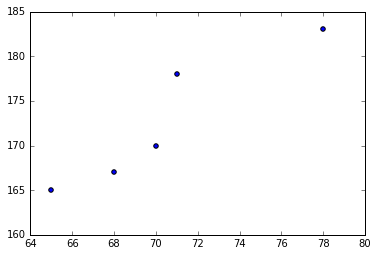

In [25]:
plt.scatter(x,y)

# 구글 스프레드 시트와 CSV

### 구글 스프레드 시트 공유 URL

```
https://docs.google.com/spreadsheets/d/1GWIfmPrWJZA4v7otl165Y0GD4OJTxg6QF6n6rejcwW4/view?usp=sharing
```

### 스프레드 시트의 CSV URL

```python
docs_key = "1GWIfmPrWJZA4v7otl165Y0GD4OJTxg6QF6n6rejcwW4"
url = "https://docs.google.com/feeds/download/spreadsheets/Export?key=%s&exportFormat=csv" % docs_key
```

In [26]:
docs_key = "1GWIfmPrWJZA4v7otl165Y0GD4OJTxg6QF6n6rejcwW4"
url = "https://docs.google.com/feeds/download/spreadsheets/Export?key=%s&exportFormat=csv" % docs_key

df_docs = pd.read_csv(url, index_col='날짜', parse_dates=True)
df_docs.head()

,코스피,삼성전자,LG화학,KB금융그룹
날짜,,,,
2015-12-30,1961.31,1260000.00,328500.00,33150.00
2015-12-29,1966.31,1254000.00,332000.00,33350.00
2015-12-28,1964.06,1245999.99,329000.00,32920.00
2015-12-24,1990.65,1264699.83,333439.28,33065.66
2015-12-23,1999.22,1274541.86,334919.05,33211.33


In [27]:
len(df_docs)

248

In [28]:
start=datetime(2015, 1, 1)
end=datetime(2015, 12, 31)

code_names = {
    '^KS11':'코스피',
    '005930.KS':'삼성전자', 
    '051910.KS':'LG화학', 
    '105560.KS':'KB금융', 
}
display( list(code_names.keys()) )

p = data.get_data_yahoo(list(code_names.keys()), start=start, end=end)
display( p['Adj Close'].head() )

['051910.KS', '005930.KS', '^KS11', '105560.KS']

,005930.KS,051910.KS,105560.KS,^KS11
Date,,,,
2015-01-01,1305014.42,178557.72,35104.96,NaN
2015-01-02,1307964.71,177571.22,34959.29,1926.439941
2015-01-05,1310915.01,172145.43,34376.64,1915.750000
2015-01-06,1273544.59,163760.12,34279.53,1882.449951
2015-01-07,1285345.77,162280.36,33988.20,1883.829956


# 필터링
불린 마스크(boolean mask)를 사용한 필터링(filtering) 

In [29]:
# boolean mask
mask = p['Volume']['^KS11'] > 0
display(mask.head())

# ix에서 boolan mask의 True인 row 추출
df = p['Adj Close'].ix[mask]
display( df.head() )

Date
2015-01-01    False
2015-01-02     True
2015-01-05     True
2015-01-06     True
2015-01-07     True
Freq: B, Name: ^KS11, dtype: bool

,005930.KS,051910.KS,105560.KS,^KS11
Date,,,,
2015-01-02,1307964.71,177571.22,34959.29,1926.439941
2015-01-05,1310915.01,172145.43,34376.64,1915.750000
2015-01-06,1273544.59,163760.12,34279.53,1882.449951
2015-01-07,1285345.77,162280.36,33988.20,1883.829956
2015-01-08,1292229.80,165733.14,35541.95,1904.650024


In [30]:
# 컬럼 이름 바꾸기
df = df.rename(columns=code_names)
df.head()

,삼성전자,LG화학,KB금융,코스피
Date,,,,
2015-01-02,1307964.71,177571.22,34959.29,1926.439941
2015-01-05,1310915.01,172145.43,34376.64,1915.750000
2015-01-06,1273544.59,163760.12,34279.53,1882.449951
2015-01-07,1285345.77,162280.36,33988.20,1883.829956
2015-01-08,1292229.80,165733.14,35541.95,1904.650024


In [31]:
# 상관계수
chg = df.pct_change()
chg_corr = chg.corr()
chg_corr.style.bar(color='#d65f5f')

In [32]:
def basic_linear_regression(x, y):
    dff_x = x - x.mean()
    dff_y = y - y.mean()

    b = np.sum(dff_x * dff_y) / np.sum(dff_x ** 2)
    a = y.mean() - b * x.mean()

    return b, a

In [33]:
basic_linear_regression(df['코스피'], df['삼성전자'])

(617.2134304875525, 36771.070862195455)

In [34]:
len(df)

248

# 베타계수 (beta coefficient)

* 베타: 증권시장 전체의 변동에 대한 개별자산의 수익률의 민감도(sensitivity)
* 예) 시장 수익률이 1% 증가하거나 감소할 때 주식 A의 수익률은 2% 증가하거나 감소한다면 주식 A의 베타계수는 2
* 예) 주식의 베타가 1이면, 이 주식의 수익률 변동은 시장과 동일, 1보다 크면 시장수익 변동폭보다 크다

# 엑셀 문서

https://drive.google.com/file/d/0B2Op0f7i-jUEWjlJY1hKYURqYTA/view?usp=sharing

In [35]:
Image(url="https://goo.gl/AtkBpe")

In [36]:
df.head()

,삼성전자,LG화학,KB금융,코스피
Date,,,,
2015-01-02,1307964.71,177571.22,34959.29,1926.439941
2015-01-05,1310915.01,172145.43,34376.64,1915.750000
2015-01-06,1273544.59,163760.12,34279.53,1882.449951
2015-01-07,1285345.77,162280.36,33988.20,1883.829956
2015-01-08,1292229.80,165733.14,35541.95,1904.650024


In [37]:
rets = df.pct_change(1)
rets.head()

,삼성전자,LG화학,KB금융,코스피
Date,,,,
2015-01-02,NaN,NaN,NaN,NaN
2015-01-05,0.002256,-0.030556,-0.016667,-0.005549
2015-01-06,-0.028507,-0.048711,-0.002825,-0.017382
2015-01-07,0.009266,-0.009036,-0.008499,0.000733
2015-01-08,0.005356,0.021277,0.045714,0.011052


In [38]:
beta = rets['코스피'].cov(rets['삼성전자']) / rets['코스피'].var()
alpha = rets['삼성전자'].mean() - beta * rets['코스피'].mean()

print ('beta = %.6f, alpha =%.6f' % (beta, alpha))

beta = 0.949675, alpha =-0.000110


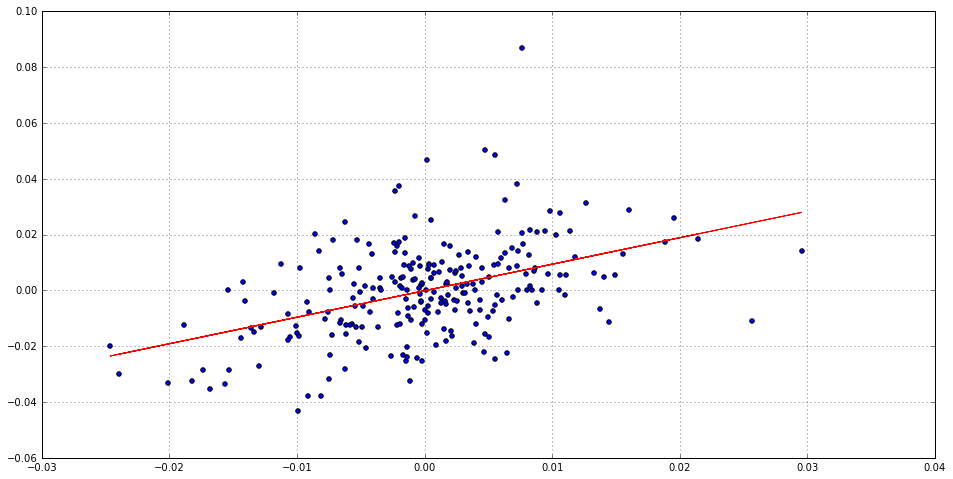

In [39]:
trend_x = rets['코스피'] 
trend_y = rets['코스피'] * beta +  alpha

plt.figure(figsize=(16,8))
plt.scatter(rets['코스피'], rets['삼성전자'])
plt.plot(trend_x,trend_y, 'r-')
plt.grid()
plt.show()

In [40]:
def market_beta(market_returns, stock_returns):
    beta = market_returns.cov(stock_returns) / market_returns.var()
    return beta

print ('삼성전자 시장 베타 = %.6f' % market_beta(rets['코스피'], rets['삼성전자']))
print ('LG화학 시장 베타 = %.6f' % market_beta(rets['코스피'], rets['LG화학']))
print ('KB금융 시장 베타 = %.6f' % market_beta(rets['코스피'], rets['KB금융']))

삼성전자 시장 베타 = 0.949675
LG화학 시장 베타 = 1.621319
KB금융 시장 베타 = 0.760768
